In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv("Data1.csv")
df.shape

(2227, 3)

In [49]:
df.head()


,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [50]:
df['x2'].mode()

0   -113.0
1    -55.0
dtype: float64

In [51]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [52]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [53]:
df['x1'] = df['x1'].fillna(df['x1'].mode()[0])
df['x2'] = df['x2'].fillna(df['x2'].mode()[0])

In [54]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

<AxesSubplot:xlabel='x1'>

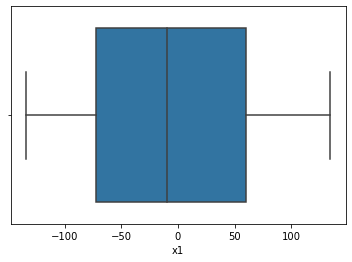

In [55]:
import seaborn as sns
sns.boxplot(x=df['x1'])

<AxesSubplot:xlabel='x2'>

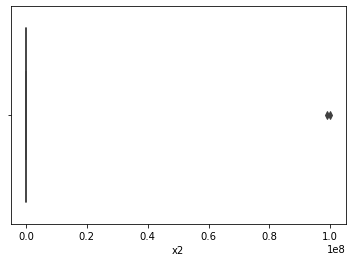

In [56]:
import seaborn as sns
sns.boxplot(x=df['x2'])

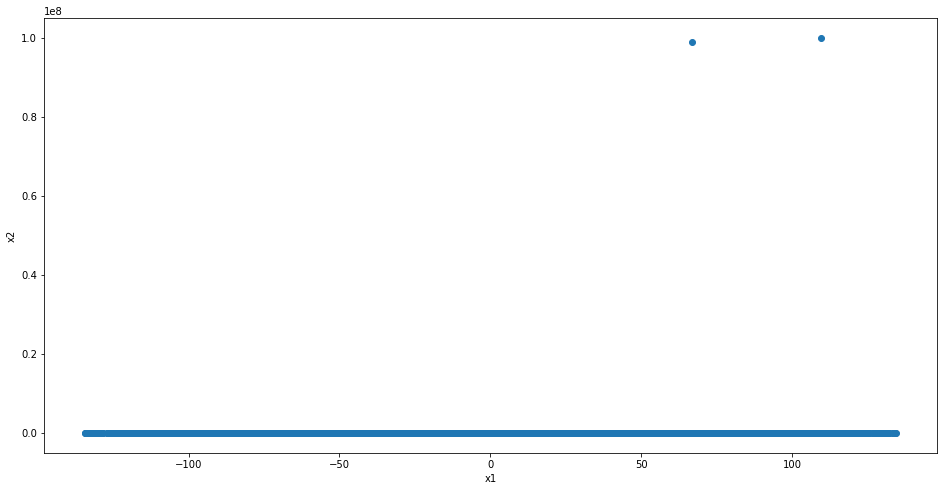

In [57]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['x1'], df['x2'])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()

In [58]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

x1    131.803998
x2    144.333978
y       1.000000
dtype: float64


# Feature Scaling

In [59]:
df_scaled = df.copy()
col_names = ['x1', 'x2']
features = df_scaled[col_names]
features.head()

,x1,x2
0,-119.366669,115.000000
1,-101.108044,97.777159
2,-130.278658,106.767654
3,-114.703415,101.195477
4,-119.366669,115.000000


In [60]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,x1,x2,y
0,-0.828630,0.807614,1
1,-0.690102,0.688287,1
2,-0.911420,0.750577,1
3,-0.793250,0.711971,1
4,-0.828630,0.807614,1
...,...,...,...
2222,0.825954,0.631932,0
2223,0.810167,0.641333,0
2224,0.727018,0.730288,0
2225,0.676070,0.555458,0


In [61]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


# Modeling

In [62]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [63]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# Logistic Regression

In [64]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [65]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[242,  60],
       [175,  80]], dtype=int64)

In [66]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.578096947935368
Precision: 0.5714285714285714
Recall: 0.3137254901960784


# SVM Linear

In [67]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [68]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5421903052064632


In [69]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.0
Recall: 0.0


# SVM rbf

In [70]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # rbf Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [71]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5421903052064632


In [72]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.0
Recall: 0.0


# Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [74]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9245960502692998


# KNN

In [75]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [76]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9533213644524237


conclusion:compared to all models KNN is the best model .By applying all models to the data set , we get the high accuracy in KNN model i.e, 0.95 by seeing this we can say that the our data prediction is very good.